In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def scrape_property_details(base_url, num_pages):
    property_data = []

    for page_num in range(1, num_pages + 1):
        page_url = f"{base_url}-{page_num}.html"
        response = requests.get(page_url)

        if response.status_code == 200:
            soup = BeautifulSoup(response.content, "html.parser")
            articles = soup.find_all('article')

            for article in articles:
                href = article.find('a')['href']
                ad = requests.get("https://www.zameen.com" + href)
                soup = BeautifulSoup(ad.content, "html.parser")
                details_ul = soup.find('ul', class_="_033281ab")

                if details_ul:
                    details = details_ul.find_all('li')
                    property_details = {"City": base_url.split('/')[-1].split('-')[0].capitalize()}

                    for detail in details:
                        label_span = detail.find('span', class_="_3af7fa95")
                        value_span = detail.find('span', class_="_812aa185")

                        if label_span and value_span:
                            label = label_span.get_text().strip()
                            value = value_span.get_text().strip()

                            property_details[label] = value

                    property_data.append(property_details)
        else:
            print(f"Failed to retrieve page: {page_url}")

    return property_data

In [ ]:
num_pages = 10
all_property_data = []
base_urls = [
    "https://www.zameen.com/Homes/Lahore-1",
    "https://www.zameen.com/Homes/Islamabad-3",
    "https://www.zameen.com/Homes/Karachi-2",
    "https://www.zameen.com/Homes/Gujranwala-327",
    "https://www.zameen.com/Homes/Rawalpindi-41"
]

for base_url in base_urls:
    property_data = scrape_property_details(base_url, num_pages)
    all_property_data.extend(property_data)

# Create a DataFrame from all the property data
data = pd.DataFrame(all_property_data)

In [ ]:
df = data

In [ ]:
columns_to_drop = ['Initial Amount', 'Monthly Installment', 'Remaining Installments', 'Added']
df = df.drop(columns=columns_to_drop)
df

,City,Type,Price,Location,Bath(s),Area,Purpose,Bedroom(s)
0,Lahore,House,PKR1.25 Crore,"Central Park Housing Scheme, Lahore, Punjab",4,3.5 Marla,For Sale,4
1,Lahore,House,PKR81 Lakh,"Thokar Niaz Baig, Lahore, Punjab",3,3 Marla,For Sale,3
2,Lahore,House,PKR1.35 Crore,"Park View City, Lahore, Punjab",4,5 Marla,For Sale,4
3,Lahore,House,PKR4.2 Crore,"Bahria Town, Lahore, Punjab",5,10 Marla,For Sale,5
4,Lahore,House,PKR3.1 Crore,"Bahria Town, Lahore, Punjab",5,8 Marla,For Sale,5
...,...,...,...,...,...,...,...,...
1245,Rawalpindi,House,PKR1.9 Crore,"Bahria Town Rawalpindi, Rawalpindi, Punjab",-,5 Marla,For Sale,-
1246,Rawalpindi,House,PKR2.1 Crore,"Bahria Town Rawalpindi, Rawalpindi, Punjab",-,5 Marla,For Sale,-
1247,Rawalpindi,House,PKR4.15 Crore,"Bahria Town Rawalpindi, Rawalpindi, Punjab",6,10 Marla,For Sale,5
1248,Rawalpindi,House,PKR1.85 Crore,"Bahria Town Rawalpindi, Rawalpindi, Punjab",4,5 Marla,For Sale,3


In [ ]:
df.replace('-', np.nan, inplace=True)

In [ ]:
df = df.dropna()

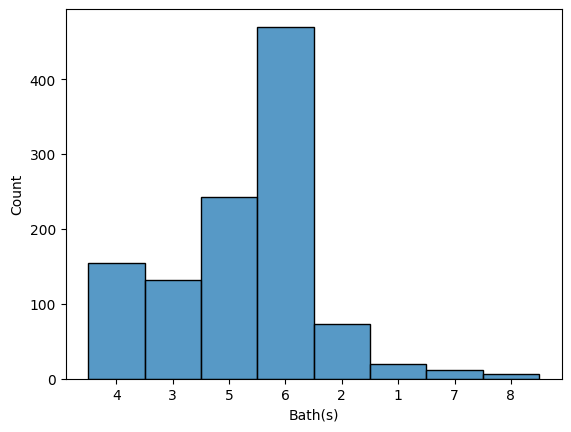

In [ ]:
sns.histplot(df['Bath(s)'])
plt.show()

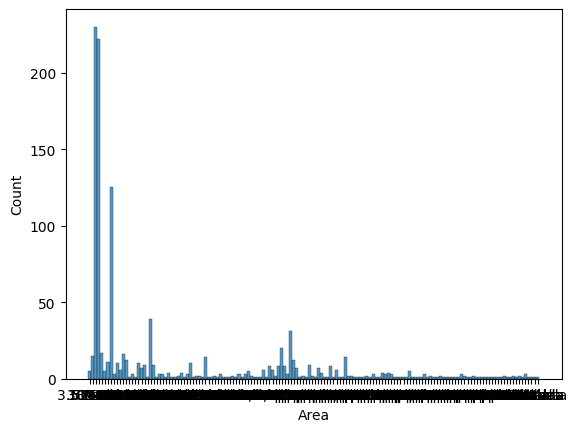

In [ ]:
sns.histplot(df['Area'])
plt.show()

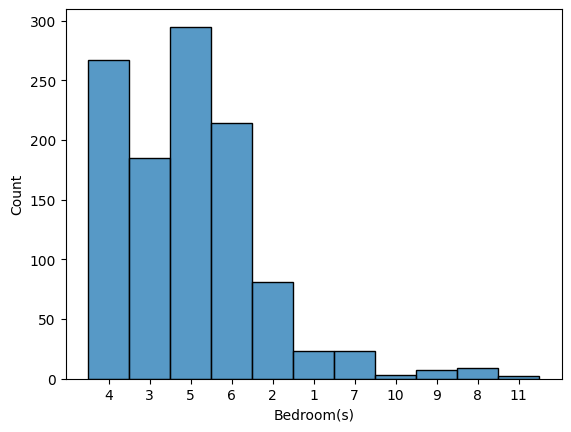

In [ ]:
sns.histplot(df['Bedroom(s)'])
plt.show()

In [ ]:
df['Bath(s)']=df['Bath(s)'].astype(int)

In [ ]:
df['Bedroom(s)']=df['Bedroom(s)'].astype(int)

In [ ]:
df['Bath(s)'].unique()

array([4, 3, 5, 6, 2, 1, 7, 8])

In [ ]:
df['Bedroom(s)'].unique()

array([ 4,  3,  5,  6,  2,  1,  7, 10,  9,  8, 11])

In [ ]:
def convert_price(price_str):
    if isinstance(price_str, str):
        price_str = price_str.replace('PKR', '').strip()

        if 'Arab' in price_str:
            price = float(price_str.replace('Arab', '').strip()) * 1000000000
        elif 'Crore' in price_str:
            price = float(price_str.replace('Crore', '').strip()) * 10000000
        elif 'Lakh' in price_str:
            price = float(price_str.replace('Lakh', '').strip()) * 100000
        else:
            price = float(price_str)

        return int(price)
    else:
        return pd.NA

In [ ]:
# Apply the function to the 'Price' column
df['Price'] = df['Price'].apply(convert_price)

# Convert the 'Price' column to int data type
df['Price'] = df['Price'].astype('Int64')

In [ ]:
df

,City,Type,Price,Location,Bath(s),Area,Purpose,Bedroom(s)
0,Lahore,House,12500000,"Central Park Housing Scheme, Lahore, Punjab",4,3.5 Marla,For Sale,4
1,Lahore,House,8100000,"Thokar Niaz Baig, Lahore, Punjab",3,3 Marla,For Sale,3
2,Lahore,House,13500000,"Park View City, Lahore, Punjab",4,5 Marla,For Sale,4
3,Lahore,House,42000000,"Bahria Town, Lahore, Punjab",5,10 Marla,For Sale,5
4,Lahore,House,31000000,"Bahria Town, Lahore, Punjab",5,8 Marla,For Sale,5
...,...,...,...,...,...,...,...,...
1237,Rawalpindi,House,4000000,"Islamabad Highway, Rawalpindi, Punjab",1,2 Marla,For Sale,1
1241,Rawalpindi,House,37500000,"Airport Housing Society, Rawalpindi, Punjab",6,10 Marla,For Sale,6
1247,Rawalpindi,House,41500000,"Bahria Town Rawalpindi, Rawalpindi, Punjab",6,10 Marla,For Sale,5
1248,Rawalpindi,House,18500000,"Bahria Town Rawalpindi, Rawalpindi, Punjab",4,5 Marla,For Sale,3


In [ ]:
df.columns

Index(['City', 'Type', 'Price', 'Location', 'Bath(s)', 'Area', 'Purpose',
       'Bedroom(s)'],
      dtype='object')

In [ ]:
df.describe()

,Price,Bath(s),Bedroom(s)
count,1109.0,1109.000000,1109.000000
mean,54605082.951307,4.812444,4.431921
std,88881605.255592,1.405568,1.469335
min,750000.0,1.000000,1.000000
25%,18000000.0,4.000000,3.000000
50%,33500000.0,5.000000,4.000000
75%,60000000.0,6.000000,5.000000
max,1550000000.0,8.000000,11.000000


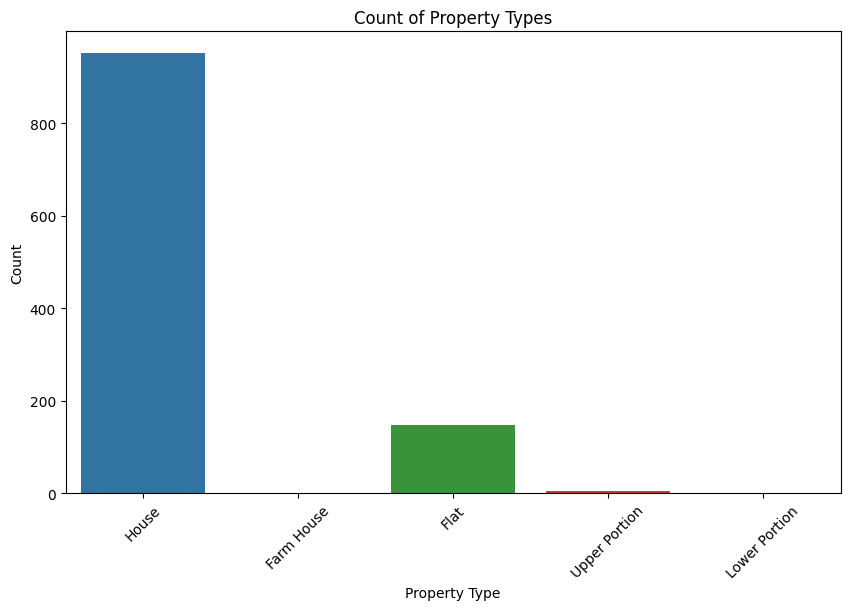

In [ ]:
city_counts = df['City'].value_counts()
# Visualize count of property types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Type')
plt.title('Count of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

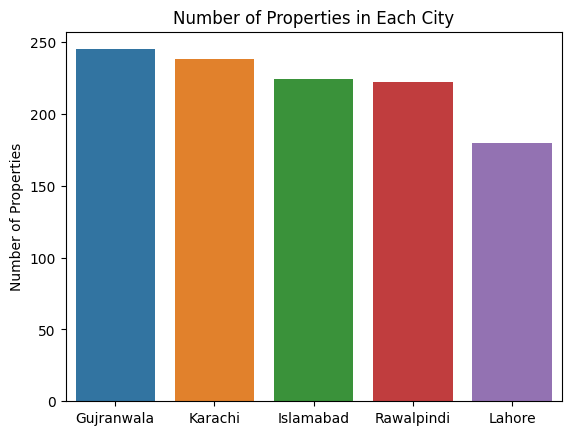

In [ ]:
sns.barplot(x=city_counts.index,y=city_counts.values)
plt.title("Number of Properties in Each City")
plt.ylabel("Number of Properties")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


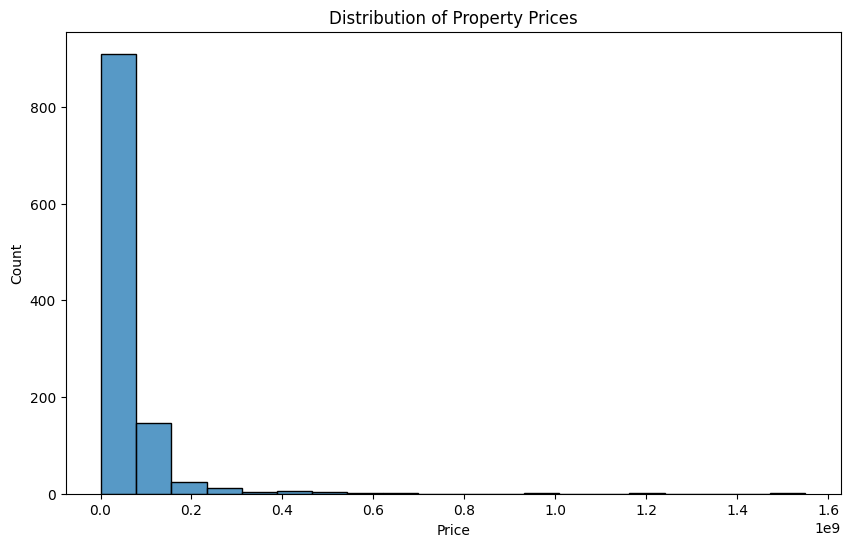

In [ ]:
# Visualize distribution of property prices
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Price', bins=20)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

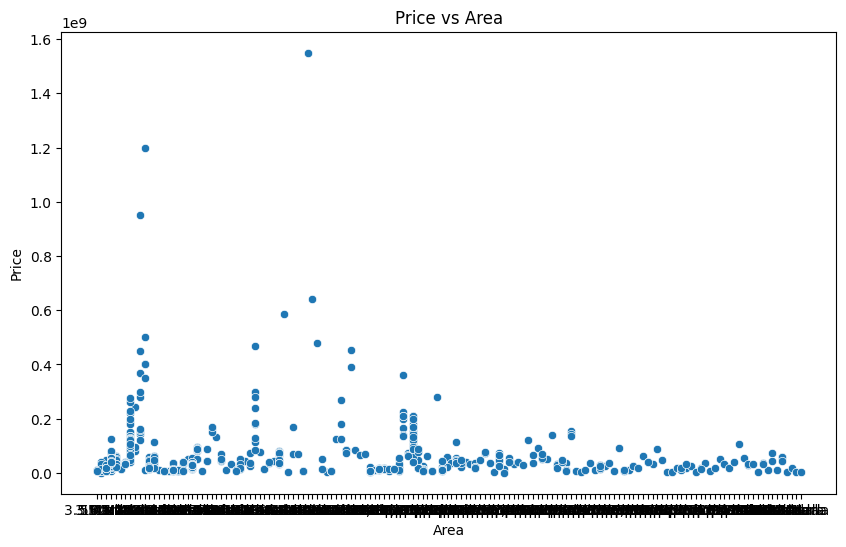

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Area', y='Price')
plt.title('Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


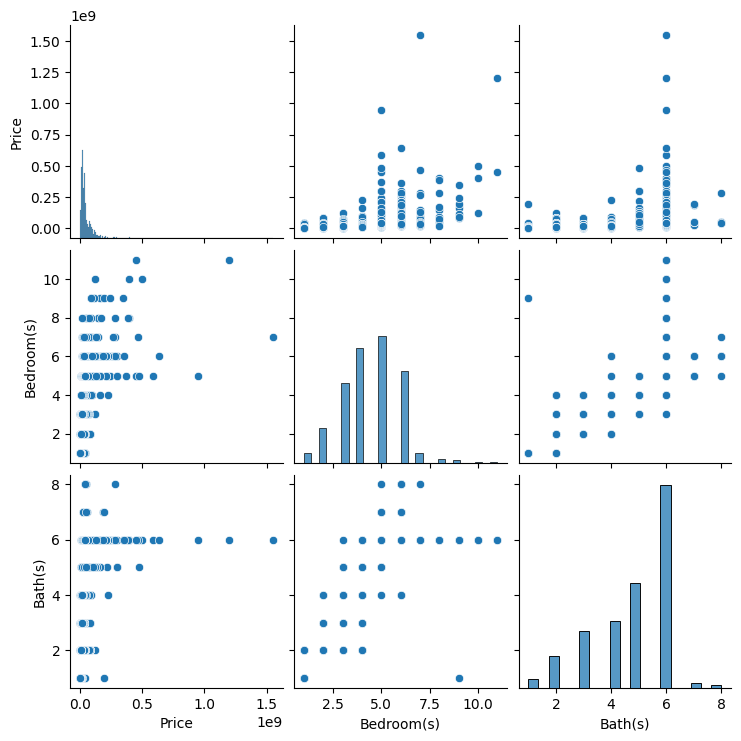

In [ ]:
sns.pairplot(df[['Price', 'Area', 'Bedroom(s)', 'Bath(s)']])
plt.show()

In [ ]:
df.to_csv('zameen_property_details.csv', index=False)